In [0]:
#module import
#modules have been given their own cell to avoid having to re-define network or
#perform other operations after terminating runtime sessions


#tensorflow 2.0 modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, regularizers

#helper modules
import numpy as np
import matplotlib.pyplot as plt

#dataset module
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [0]:
#alternate tensorflow data loader and pipeline


ds_train = tfds.load(name='cifar10', split='train')
ds_test = tfds.load(name='cifar10', split='test')

#extend dataset, shuffle, and split into batches
ds_train = ds_train.repeat().shuffle(1024).batch(32)

In [0]:
#data augmentation and shuffling


ds_train_flip = tf.image.flip_left_right(ds_train)
ds_train = [ds_train, ds_train_flip]

#extend dataset, shuffle, and split into batches
ds_train = ds_train.repeat().shuffle(1024).batch(32)

In [2]:
#data loader and normalizer


#cifar = tf.keras.datasets.cifar10

(imtrain, labtrain), (imtest, labtest) = datasets.cifar10.load_data()
#normalize pixel values
imtrain, imtest = imtrain / 255.0, imtest / 255.0

#imtrain_flip = tf.image.flip_left_right(imtrain)
#imtrain = [imtrain, imtrain_flip]

#labels do not inherently map to names, so we pre-define them to match a label vector
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#check to see if GPU is available
print(tf.config.list_physical_devices('GPU'))

170500096/170498071 [==============================] - 2s 0us/step
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [24]:
#network definition


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(48, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(48, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 48)        13872     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 48)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 6, 6, 48)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 48)        

In [27]:
#compile and train model

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(imtrain, labtrain, epochs=20, validation_data=(imtest, labtest))

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0564 - accuracy: 0.6878 - val_loss: 1.0253 - val_accuracy: 0.7013
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0373 - accuracy: 0.6952 - val_loss: 1.0143 - val_accuracy: 0.7018
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0217 - accuracy: 0.6990 - val_loss: 1.0165 - val_accuracy: 0.7037
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9953 - accuracy: 0.7077 - val_loss: 1.1240 - val_accuracy: 0.6906
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9738 - accuracy: 0.7138 - val_loss: 1.0041 - val_accuracy: 0.7131
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9665 - accuracy: 0.7201 - val_loss: 0.9450 - val_accuracy: 0.7236
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9938 - accuracy: 0.7092 - val_loss: 0.9741 - val_accuracy:

313/313 - 1s - loss: 1.0175 - accuracy: 0.7100


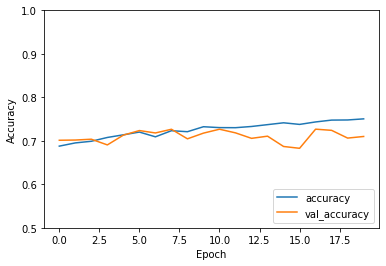

In [29]:
#performance evaluation cell

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(imtest,  labtest, verbose=2)